## Mental Health Data

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('Mental Health Data.xlsx')

In [3]:
df

Country  Current_Health_Expenditures_(Percent_ of_GDP)  \
0      Afghanistan                                      10.962000   
1          Albania                                       4.916020   
2          Algeria                                       6.607782   
3           Angola                                       2.713150   
4        Argentina                                       9.001897   
..             ...                                            ...   
152  Venezuela, RB                                       5.226116   
153        Vietnam                                       5.659194   
154    Yemen, Rep.                                            NaN   
155         Zambia                                       4.477207   
156       Zimbabwe                                       7.647620   

     Happiness_Rank  Happiness_Score  Lower_Confidence_Interval  \
0             154.0            3.360                      3.288   
1             109.0            4.655                      4.546   
2              38.0            6.355                      6.227   
3             141.0            3.866                      3.753   
4              26.0            6.650                      6.560   
..              ...              ...                        ...   
152            44.0            6.084                      5.973   
153            96.0            5.061                      4.991   
154           147.0            3.724                      3.621   
155           106.0            4.795                      4.645   
156           131.0            4.193                      4.101   

     Upper_Confidence_Interval  Economy_(GDP_per_Capita)   Family  \
0                        3.432                   0.38227  0.11037   
1                        4.764                   0.95530  0.50163   
2                        6.483                   1.05266  0.83309   
3                        3.979                   0.84731  0.66366   
4                        6.740                   1.15137  1.06612   
..                         ...                       ...      ...   
152                      6.195                   1.13367  1.03302   
153                      5.131                   0.74037  0.79117   
154                      3.827                   0.57939  0.47493   
155                      4.945                   0.61202  0.63760   
156                      4.285                   0.35041  0.71478   

     Health_(Life_Expectancy)  Freedom  ...  Mental _hospitals  health_units  \
0                     0.17344  0.16430  ...              0.003         0.012   
1                     0.73007  0.31866  ...              0.068         0.068   
2                     0.61804  0.21006  ...              0.048         0.068   
3                     0.04991  0.00589  ...              0.011           NaN   
4                     0.69711  0.42284  ...              0.937         1.071   
..                        ...      ...  ...                ...           ...   
152                   0.61904  0.19847  ...                NaN           NaN   
153                   0.66157  0.55954  ...              0.043         0.017   
154                   0.31048  0.22870  ...              0.033         0.026   
155                   0.23573  0.42662  ...              0.062         0.062   
156                   0.15950  0.25429  ...              0.025         0.025   

     outpatient _facilities  Psychiatrists  Nurses  Social_workers  \
0                     0.006          0.231   0.098             NaN   
1                     0.410          1.471   6.876           1.060   
2                     0.048            NaN     NaN             NaN   
3                       NaN          0.057   0.660           0.022   
4                     1.720         21.705     NaN             NaN   
..                      ...            ...     ...             ...   
152                     NaN            NaN     NaN             NaN   
153                   0.009

In [4]:
df.columns

Index(['Country', 'Current_Health_Expenditures_(Percent_ of_GDP)',
       'Happiness_Rank', 'Happiness_Score', 'Lower_Confidence_Interval',
       'Upper_Confidence_Interval', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual', 'Age_Standarized_Suicide_Rate',
       'Mental _hospitals', 'health_units', 'outpatient _facilities',
       'Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists',
       'Population', 'GDP', 'Region'],
      dtype='object')

# Visualization

### Scatter Plots

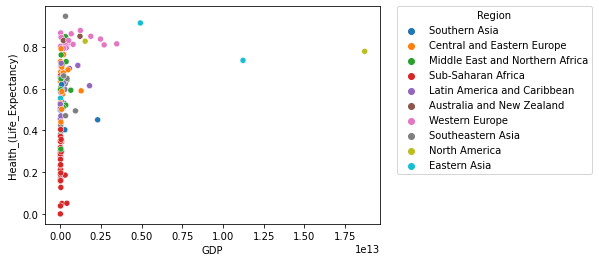

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="Health_(Life_Expectancy)", x="GDP", hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Region")

In [6]:
# Create a new variable
df['log_GDP'] = np.log(df['GDP'])

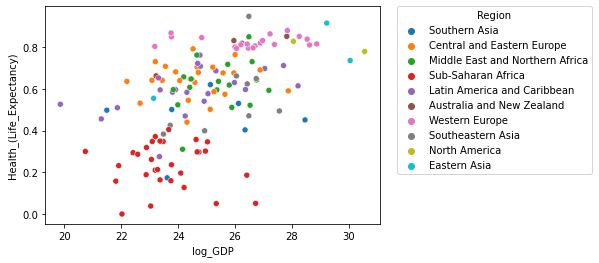

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="Health_(Life_Expectancy)", x='log_GDP', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Region")

## Line Plot

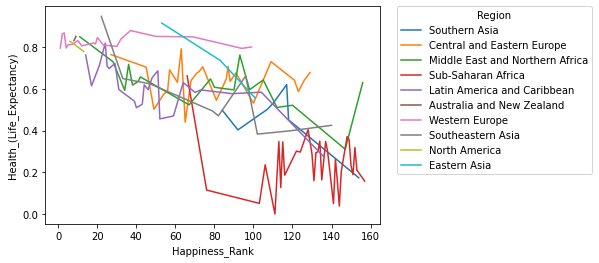

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df, y="Health_(Life_Expectancy)", x='Happiness_Rank', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Region")

## Create new variables

#### Continuous to Categorical

In [9]:
df['Happy'] = ['Not_Happy' if i<df['Happiness_Score'].quantile(.33) 
                           else ('Neutral' if i<=df['Happiness_Score'].quantile(.67) 
                           else 'Happy') 
                           for i in df['Happiness_Score']]

In [10]:
df['Rich'] = ['Poor' if i<df['Economy_(GDP_per_Capita)'].quantile(.33) 
                     else ('Neutral' if i<=df['Economy_(GDP_per_Capita)'].quantile(.67) 
                     else 'Rich') 
                     for i in df['Economy_(GDP_per_Capita)']]

In [11]:
df.dtypes

Country                                           object
Current_Health_Expenditures_(Percent_ of_GDP)    float64
Happiness_Rank                                   float64
Happiness_Score                                  float64
Lower_Confidence_Interval                        float64
Upper_Confidence_Interval                        float64
Economy_(GDP_per_Capita)                         float64
Family                                           float64
Health_(Life_Expectancy)                         float64
Freedom                                          float64
Trust_(Government_Corruption)                    float64
Generosity                                       float64
Dystopia_Residual                                float64
Age_Standarized_Suicide_Rate                     float64
Mental _hospitals                                float64
health_units                                     float64
outpatient _facilities                           float64
Psychiatrists                  

#### Categorical to Categorical

In [12]:
df['Region'].value_counts()

Sub-Saharan Africa                 34
Central and Eastern Europe         25
Latin America and Caribbean        23
Western Europe                     20
Middle East and Northern Africa    18
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        3
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [13]:
df['Region2']= ['Asia' if i in ['Southeastern Asia', 'Southern Asia', 'Eastern Asia'] 
                       else ('Europe' if i in ['Central and Eastern Europe', 'Western Europe'] 
                       else  'Africa' if i in ['Sub-Saharan Africa', 'Middle East and Northern Africa']  
                       else 'Others')       
                       for i in df['Region']]

In [14]:
df['Region2'].value_counts()

Africa    52
Europe    45
Others    41
Asia      19
Name: Region2, dtype: int64

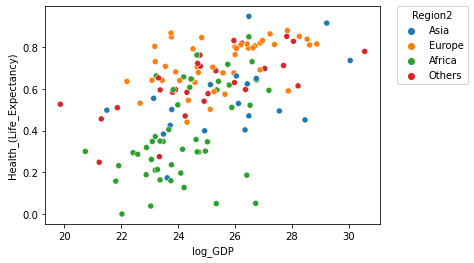

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="Health_(Life_Expectancy)", x='log_GDP', hue='Region2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Region2")

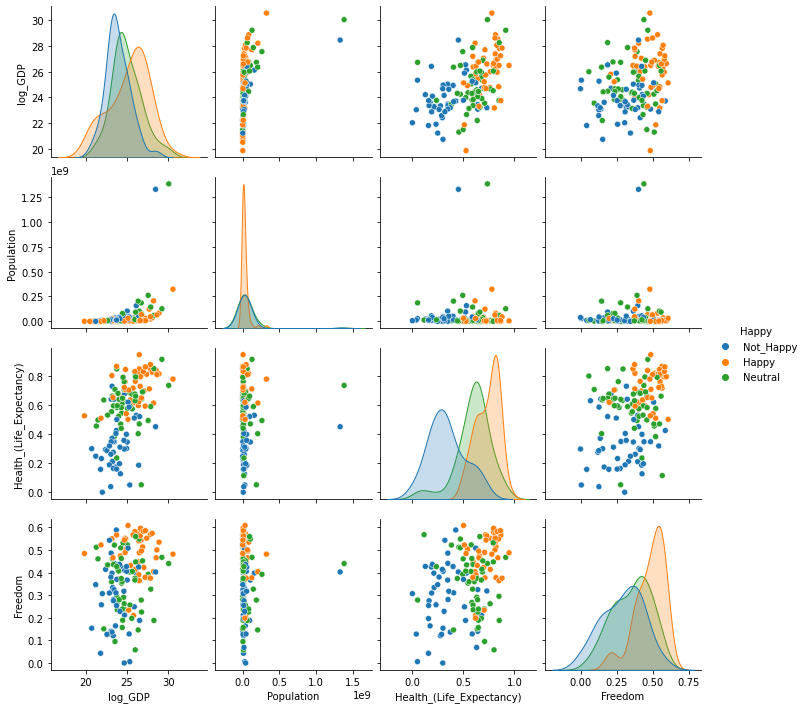

In [16]:
df1 = df[['log_GDP', 'Population','Health_(Life_Expectancy)', 'Freedom','Happy']]
sns.pairplot(df1, hue="Happy")

## Boxplots

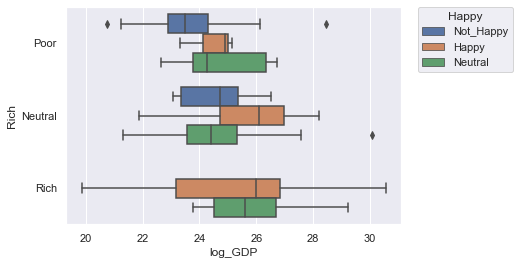

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
ax = sns.boxplot(x="log_GDP", y='Rich',data=df, hue='Happy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Happy")

## Distribution Plots

<AxesSubplot:xlabel='Happiness_Score', ylabel='Density'>

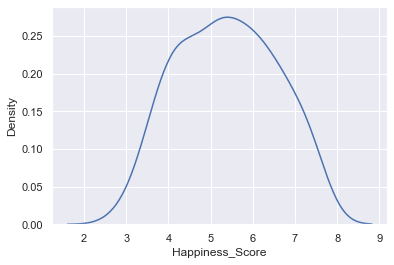

In [18]:
sns.kdeplot(x = 'Happiness_Score', data=df)

<AxesSubplot:xlabel='log_GDP', ylabel='Density'>

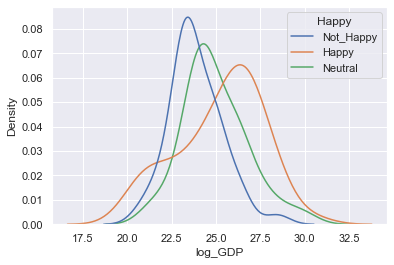

In [19]:
sns.kdeplot(x = 'log_GDP', hue = 'Happy', data=df)

### Hypothesis Testing

#### 1. Two categorical variables

- Association Test (Chi-square test of independence)
- If pvalue <.05, there is a association between the two variables. 

In [20]:
import pandas
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0))[1])

In [21]:
print('p-value is: ', chisq_of_df_cols(df, 'Happy', 'Region2'))

p-value is:  2.003259244116354e-12


In [22]:
print(chisq_of_df_cols(df, 'Rich', 'Region2'))

2.6555789860307423e-09


#### 2. One categorical, one continuous variable

-  ANOVA

In [23]:
from scipy.stats import f_oneway
pvalue = f_oneway(*[s for idx, s in df.dropna().groupby('Happy')['GDP']])[1]
print('p-value is: ', pvalue)

p-value is:  0.34785583665400355


In [24]:
from scipy.stats import f_oneway
pvalue = f_oneway(*[s for idx, s in df.dropna().groupby('Region2')['GDP']])[1]
print('p-value is: ', pvalue)

p-value is:  0.31664891312550747


#### 3. Two continuous variables

- Correlation 

In [25]:
coef = np.corrcoef(df.dropna()['GDP'], df.dropna()['Happiness_Score'])[1][0]
print('Correlation is: ', coef)

Correlation is:  0.3333067226196712


# Modeling

Predicting GDP per capital

In [26]:
# Import the data
import pandas as pd
import numpy as np
df = pd.read_excel('Mental Health Data.xlsx')

### Fill missing data with the mean

In [27]:
df = df.fillna(value=df.mean())

In [28]:
# Assign input variables
X = df.drop(['GDP','Economy_(GDP_per_Capita)','Country','Region'], axis=1)

In [29]:
y = df['Economy_(GDP_per_Capita)']

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Linear Model

In [32]:
from sklearn import linear_model
from sklearn.metrics import r2_score


# Create a decision tree and train
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.9999995470844321
Rsquared on Testing 0.9999994228369264


### Coefficients

In [35]:
coef = pd.DataFrame({'Variable':X.columns, 
                     'Coef':model.coef_,
                     'Absolute Coef': np.abs(model.coef_),
                     'Effect':['Positive' if i>0 else 'Negative' for i in model.coef_]
                    })

coef = coef.sort_values('Absolute Coef', ascending=False).reset_index(drop=True)
coef


Variable          Coef  \
0                                      Generosity -1.000164e+00   
1                                          Family -1.000079e+00   
2                               Dystopia_Residual -9.999106e-01   
3                                         Freedom -9.998158e-01   
4                        Health_(Life_Expectancy) -9.997054e-01   
5                   Trust_(Government_Corruption) -9.996119e-01   
6                       Lower_Confidence_Interval  3.341549e-01   
7                                 Happiness_Score  3.332535e-01   
8                       Upper_Confidence_Interval  3.323520e-01   
9                                    health_units  1.405409e-04   
10                         outpatient _facilities -3.397975e-05   
11                              Mental _hospitals -2.869744e-05   
12  Current_Health_Expenditures_(Percent_ of_GDP) -9.762129e-06   
13                                         Nurses  6.398568e-06   
14                                  Psychiatrists -6.031792e-06   
15                                 Happiness_Rank -4.536917e-06   
16                                 Social_workers -4.370617e-06   
17                   Age_Standarized_Suicide_Rate -3.361112e-06   
18                                  Psychologists  1.940876e-07   
19                                     Population  1.470766e-13   

    Absolute Coef    Effect  
0    1.000164e+00  Negative  
1    1.000079e+00  Negative  
2    9.999106e-01  Negative  
3    9.998158e-01  Negative  
4    9.997054e-01  Negative  
5    9.996119e-01  Negative  
6    3.341549e-01  Positive  
7    3.332535e-01  Positive  
8    3.323520e-01  Positive  
9    1.405409e-04  Positive  
10   3.397975e-05  Negative  
11   2.869744e-05  Negative  
12   9.762129e-06  Negative  
13   6.398568e-06  Positive  
14   6.031792e-06  Negative  
15   4.536917e-06  Negative  
16   4.370617e-06  Negative  
17   3.361112e-06  Negative  
18   1.940876e-07  Positive  
19   1.470766e-13  Positive

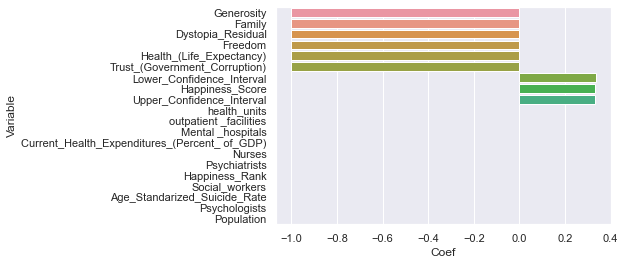

In [36]:
import seaborn as sns
ax = sns.barplot(x="Coef", y="Variable", data=coef)
ax.figure.savefig('viz1.png',dpi=300,bbox_inches='tight')

## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# Create a decision tree and train
model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.8253169936393077
Rsquared on Testing 0.7560268173703629


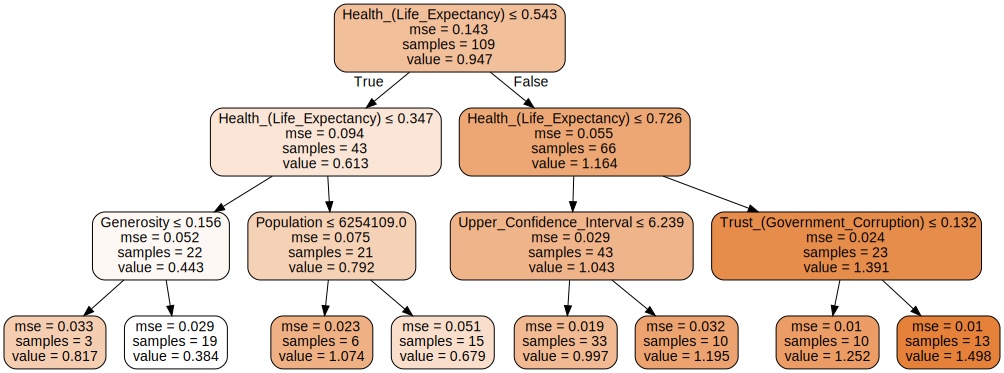

In [71]:
from sklearn import tree

import graphviz 

dot_data = tree.export_graphviz(model, out_file=None) 
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=x_train.columns,
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Create a decision tree and train
model = RandomForestRegressor()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.9619498673006511
Rsquared on Testing 0.866859347189513


## Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a decision tree and train
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.9966689066032143
Rsquared on Testing 0.886989571625767


## Variable Importance

<AxesSubplot:ylabel='Variables'>

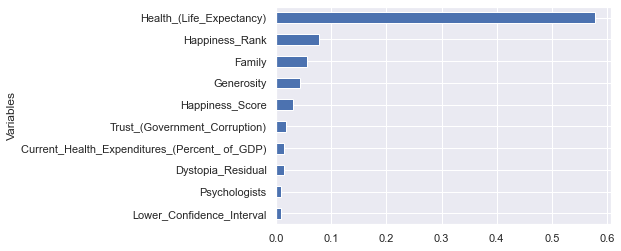

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
# Create a decision tree and train
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
                                
from sklearn.inspection import permutation_importance                                
result = permutation_importance(model, x_test, y_test, n_repeats=10,random_state=42, n_jobs=2)

sorted_idx = (-result.importances_mean).argsort()
feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':result.importances_mean[sorted_idx], 'std':result.importances_std[sorted_idx]})

df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

In [38]:
!jupyter nbconvert --to html viz_modeling.ipynb

[NbConvertApp] Converting notebook viz_modeling.ipynb to html
[NbConvertApp] Writing 1239734 bytes to viz_modeling.html
